In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
df = pd.read_csv(DATA_URL + "telecom_churn.csv")

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [110]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [111]:
df['Churn'] = df['Churn'].astype('int')

In [112]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [113]:
# pop non-numeric feature
states = df.pop('State')

In [114]:
X, y = df.drop('Churn', axis=1), df['Churn']

In [115]:
X.shape, y.shape

((3333, 18), (3333,))

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_holdout, y_train, y_holdout = \
train_test_split(X, y, test_size=0.3, random_state=17)

In [118]:
X_train.shape, X_holdout.shape

((2333, 18), (1000, 18))

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
tree = DecisionTreeClassifier(random_state=17)

In [121]:
# fit-predict

In [122]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

In [123]:
from sklearn.metrics import accuracy_score

In [124]:
pred_holdout = tree.predict(X_holdout)

In [125]:
accuracy_score(y_holdout, pred_holdout)

0.921

In [126]:
tree.get_depth()

18

In [127]:
# hyperparameter tuning:

In [128]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [129]:
params = {'max_depth': np.arange(2, 11), 'min_samples_leaf': np.arange(2, 11)}
skuf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [130]:
# it takes best combination of max depth and min_samlpes_leaf
# and fits it 5 times with cross validation
# 9^2 * 5 = 405 (tree is fitted 405 times 💀)
best_tree = GridSearchCV(estimator=tree, param_grid=params, cv=skuf)

In [131]:
best_tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [132]:
# n_jobs specifies number of cores to use
# setting it to -1 tells computer to use max number of cores available
best_tree = GridSearchCV(estimator=tree, param_grid=params, cv=skuf, n_jobs=-1)

In [133]:
best_tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [134]:
best_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 4}

In [135]:
best_tree.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, random_state=17)

**Cross-Validation assesment of model quality**

In [136]:
best_tree.best_score_  # yo!

0.9438485079633493

**Holdout assesment**

In [137]:
pred_holdout_better = best_tree.predict(X_holdout)
accuracy_score(y_holdout, pred_holdout_better)

0.94

We could do it in other way

In [138]:
from sklearn.model_selection import cross_val_score
from tqdm.notebook import tqdm

In [139]:
cv_accuracies = []
holdout_accuracies = []
max_depth_range = range(2, 11)

# for each value of max_depth range
for max_depth in tqdm(max_depth_range):
  tree = DecisionTreeClassifier(random_state=17, max_depth=max_depth)

  # perform cross_validation
  val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skuf)

  # save mean of validation accuracy scores to cv_accuracies
  cv_accuracies.append(val_scores.mean())

  # fit our tree on whole training set
  tree.fit(X_train, y_train)
  cur_holdout_pred = tree.predict(X_holdout)
  # in order to calculate accuracy score of holdout and save it to
  # holdout_accuracies
  holdout_accuracies.append(accuracy_score(y_holdout, cur_holdout_pred))

  0%|          | 0/9 [00:00<?, ?it/s]

In [140]:
cv_accuracies

[0.8769848636626811,
 0.9018352923877181,
 0.9211292975893981,
 0.9335600261003023,
 0.9361296192480539,
 0.936563398921065,
 0.9382746229701041,
 0.9318432879028775,
 0.9288445102057695]

In [141]:
holdout_accuracies

[0.881, 0.905, 0.919, 0.94, 0.945, 0.946, 0.944, 0.945, 0.945]

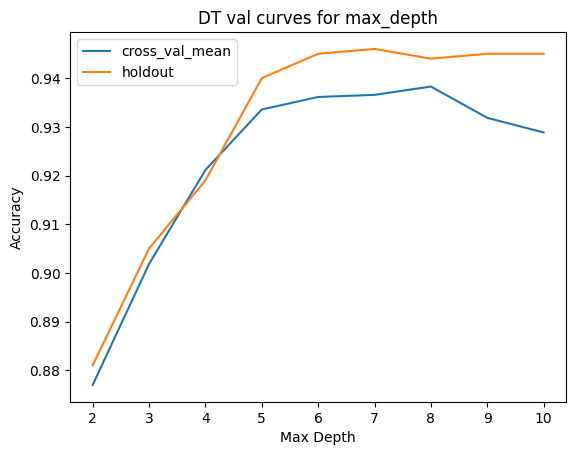

In [142]:
plt.title('DT val curves for max_depth')
plt.plot(max_depth_range, cv_accuracies, label='cross_val_mean')
plt.plot(max_depth_range, holdout_accuracies, label='holdout')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

plt.legend()
plt.show();

In [144]:
from sklearn.tree import export_graphviz

In [145]:
export_graphviz(decision_tree=best_tree.best_estimator_,
                out_file='tree.dot',
                filled=True,
                feature_names=X.columns)

In [148]:
!cat tree.dot

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Total day minutes <= 264.45\ngini = 0.255\nsamples = 2333\nvalue = [1983, 350]", fillcolor="#ea975c"] ;
1 [label="Customer service calls <= 3.5\ngini = 0.206\nsamples = 2182\nvalue = [1927, 255]", fillcolor="#e89253"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="International plan <= 0.5\ngini = 0.149\nsamples = 2004\nvalue = [1842, 162]", fillcolor="#e78c4a"] ;
1 -> 2 ;
3 [label="Total day charge <= 38.185\ngini = 0.096\nsamples = 1828\nvalue = [1736, 92]", fillcolor="#e68843"] ;
2 -> 3 ;
4 [label="Total eve charge <= 27.965\ngini = 0.056\nsamples = 1570\nvalue = [1525, 45]", fillcolor="#e6853f"] ;
3 -> 4 ;
5 [label="Total day calls <= 121.5\ngini = 0.054\nsamples = 1562\nvalue = [1519, 43]", fillcolor="#e6853f"] ;
4 -> 5 ;
6 [label="gini = 0.044\nsamples = 1336\nvalue = [1306, 30]", fillcolor="#e6843e"] ;
5 -> 6 ;
7 [label="gini =

In [150]:
tree = DecisionTreeClassifier(random_state=17, max_depth=3).fit(X_train, y_train)

In [151]:
export_graphviz(decision_tree=tree,
                out_file='small_tree.dot',
                filled=True,
                feature_names=X.columns)

In [152]:
!cat small_tree.dot

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Total day minutes <= 264.45\ngini = 0.255\nsamples = 2333\nvalue = [1983, 350]", fillcolor="#ea975c"] ;
1 [label="Customer service calls <= 3.5\ngini = 0.206\nsamples = 2182\nvalue = [1927, 255]", fillcolor="#e89253"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="International plan <= 0.5\ngini = 0.149\nsamples = 2004\nvalue = [1842, 162]", fillcolor="#e78c4a"] ;
1 -> 2 ;
3 [label="gini = 0.096\nsamples = 1828\nvalue = [1736, 92]", fillcolor="#e68843"] ;
2 -> 3 ;
4 [label="gini = 0.479\nsamples = 176\nvalue = [106, 70]", fillcolor="#f6d4bc"] ;
2 -> 4 ;
5 [label="Total day charge <= 27.185\ngini = 0.499\nsamples = 178\nvalue = [85, 93]", fillcolor="#eef7fd"] ;
1 -> 5 ;
6 [label="gini = 0.209\nsamples = 76\nvalue = [9, 67]", fillcolor="#54aae8"] ;
5 -> 6 ;
7 [label="gini = 0.38\nsamples = 102\nvalue = [76, 26]", fillcolor="#eeac7d"] ;


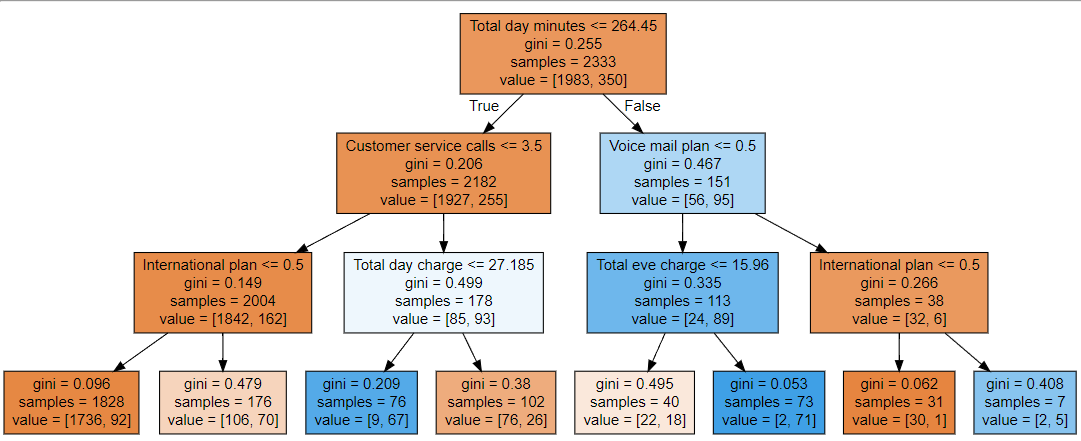

In [156]:
from io import StringIO
import pydotplus
from ipywidgets import Image

In [157]:
dot_data = StringIO()
export_graphviz(decision_tree=tree,
                out_file=dot_data,
                filled=True,
                feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x053\x00\x00\x01\xf1\x08\x06\x00\x00\x00\xb1\xa1(c\x…

In [158]:
# value tells us how many people of particular category are in this node
# blue - bad clients
# orange - good clients

<img src='https://media1.tenor.com/m/X5ndOelQYf4AAAAd/dwayne-johnson-cat.gif' width=50%>